In [1]:
import pandas as pd
from PIL import Image
import os
import shutil
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.1.0


In [3]:
dataset = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
print(dataset.shape)
df = dataset.copy()

(60000, 785)


In [4]:
print(dataset)
X = dataset.iloc[:,1:dataset.shape[1]+1].values
Y = dataset.iloc[:,0].values

clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776 

In [5]:
print(X.shape)

(60000, 784)


In [6]:
print(Y.shape)

(60000,)


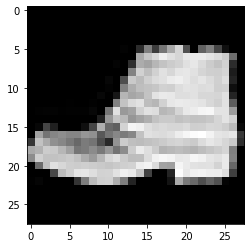

In [7]:
#run this cell again and again to visualize random images out of 60000 total images 

img_asarr = np.reshape(X[np.random.randint(0, 60000)],(28,28))
plt.imshow(img_asarr, cmap='gray', vmin=0, vmax=255)
plt.imsave('imag.jpg',img_asarr,vmin=0,vmax=255,cmap='gray')

In [8]:
#categories = ['tshirtortop','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankleboot']  #creating a list of categories
#os.mkdir('train')
#os.mkdir('test')
#for x in categories:
 # os.mkdir('train/'+x)
 # os.mkdir('test/'+x)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))


x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255


y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(48000, 10)
(12000, 10)


In [10]:
#for img_no in range(X.shape[0]):
 #   rand = np.random.uniform(0,1)
  #  gray_img = np.reshape(X[img_no],(28,28))
  #  if rand >= train_test_split:
  #      name = 'train/'+ categories[Y[img_no]]+'/Training_'+str(img_no)+'.jpg'
  #  else:
  #      name = 'test/'+ categories[Y[img_no]]+'/Test_'+str(img_no)+'.jpg'
  #  plt.imsave(name,gray_img,vmin=0,vmax=255,cmap='gray')  

In [11]:
#for category in os.listdir("train/"):
 #   print(category," size=",len(os.listdir("train/"+category+"/")))

In [12]:
#for category in os.listdir("test/"):
 #   print(category," size=",len(os.listdir("test/"+category+"/")))

In [13]:
img_size = 28
batch_size = 64

#datagen_train = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=30,rescale=1./255)
#train_generator = datagen_train.flow_from_directory("train/",batch_size=batch_size,class_mode='categorical',shuffle=True)

In [14]:
#datagen_validation = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=30,rescale=1./255)
#validation_generator = datagen_train.flow_from_directory("test/",color_mode='grayscale',batch_size=batch_size,class_mode='categorical',shuffle=False)

In [15]:
# Building a ConvNet
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
model.summary()# Building a ConvNet

datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0

In [18]:
epochs= 40
#steps_per_epoch = train_generator.n//train_generator.batch_size
#validation_steps = validation_generator.n//validation_generator.batch_size

#keeps the best instances of the trained model saved in an h5 file

#learning rate decay, in the folllowing example, lr is reduced to 1/10 of original if loss does not change after 2 epochs
#min possible lr is set to 0.00001, (it was initialized to 0.005 in Adam optimizer's class instance)

#reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor =0.1,patience = 2,min_lr = 0.00001, model='auto')
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

#using livelossplots.tf imported at beginning to visualise losses during training, instead of 
#visualizing all only after completion
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./logs'), reduce_lr]
#PlotLossesKeras()
#history = model.fit(
 #   x=train_generator,
  #  steps_per_epoch = steps_per_epoch,
  #  epochs = epochs,
   # validation_data = validation_generator,
   # validation_steps = validation_steps,
   # callbacks = callbacks
#)

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Train for 750 steps, validate on 12000 samples
Epoch 1/40
750/750 - 27s - loss: 0.8342 - accuracy: 0.7000 - val_loss: 0.4395 - val_accuracy: 0.8374
Epoch 2/40
750/750 - 21s - loss: 0.5541 - accuracy: 0.7971 - val_loss: 0.3745 - val_accuracy: 0.8658
Epoch 3/40
750/750 - 21s - loss: 0.4797 - accuracy: 0.8286 - val_loss: 0.3811 - val_accuracy: 0.8659
Epoch 4/40
750/750 - 21s - loss: 0.4494 - accuracy: 0.8381 - val_loss: 0.3094 - val_accuracy: 0.8898
Epoch 5/40
750/750 - 21s - loss: 0.4103 - accuracy: 0.8521 - val_loss: 0.3024 - val_accuracy: 0.8884
Epoch 6/40
750/750 - 21s - loss: 0.3920 - accuracy: 0.8590 - val_loss: 0.2770 - val_accuracy: 0.9007
Epoch 7/40
750/750 - 21s - loss: 0.3706 - accuracy: 0.8671 - val_loss: 0.2736 - val_accuracy: 0.9013
Epoch 8/40
750/750 - 21s - loss: 0.3596 - accuracy: 0.8712 - val_loss: 0.2806 - val_accuracy: 0.8949
Epoch 9/40
750/750 - 21s - loss: 0.3434 - accuracy: 0.8761 - val_loss: 0.2396 - val_accuracy: 0.9113
Epoch 10/40
750/750 - 21s - loss: 0.3339 - a

In [20]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

12000/12000 [==============================] - 1s 118us/sample - loss: 0.1933 - accuracy: 0.9290
Loss: 0.1933
Accuracy: 0.9290


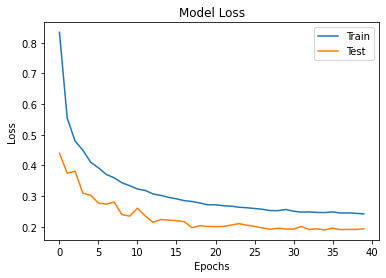

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

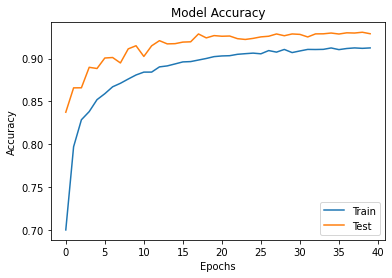

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [45]:
test_data = pd.read_csv('../input/mnist-clothing-test/Q2_Clothing_test.csv')
print(test_data.shape)
test_data = test_data.iloc[:,:].values
test_data = test_data.astype("float32")/255
test_data = test_data.reshape((test_data.shape[0],28,28,1))
print(test_data.shape)

(1000, 784)
(1000, 28, 28, 1)


In [49]:
arr = model.predict(test_data)


In [48]:
arr = np.argmax(arr,axis=1)
print(arr.shape)
print(arr)

AxisError: axis 1 is out of bounds for array of dimension 1

In [38]:
with open('results.txt','w') as res:
    for x in range(test_data.shape[0]):
        res.write(clothing[arr[x]]+'\n')

(48000, 28, 28, 1)
